<a href="https://colab.research.google.com/github/asmajabr/FraudDetectionML/blob/master/CreditCardFraudDetection_DTUpdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information about data set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. 

# Import Data from Drive [OK]

Please download the data from https://www.kaggle.com/mlg-ulb/creditcardfraud

Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not



In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os 


In [3]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content
total 20K
drwxr-xr-x 1 root root 4.0K Jun 26 15:08 .
drwxr-xr-x 1 root root 4.0K Jun 26 15:01 ..
drwxr-xr-x 1 root root 4.0K Jun 19 16:15 .config
drwx------ 4 root root 4.0K Jun 26 15:08 gdrive
drwxr-xr-x 1 root root 4.0K Jun 17 16:18 sample_data


In [5]:
!wc -l creditcard.csv


wc: creditcard.csv: No such file or directory


In [6]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content
total 20K
drwxr-xr-x 1 root root 4.0K Jun 26 15:08 .
drwxr-xr-x 1 root root 4.0K Jun 26 15:01 ..
drwxr-xr-x 1 root root 4.0K Jun 19 16:15 .config
drwx------ 4 root root 4.0K Jun 26 15:08 gdrive
drwxr-xr-x 1 root root 4.0K Jun 17 16:18 sample_data


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

url = "/content/gdrive/My Drive/creditcard.csv"

creditcard = pd.read_csv(url)

creditcard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0


# How to Deal with Imbalanced Dataset [OK]

In [8]:
print(creditcard.shape)

(284807, 31)


In [ ]:
print(creditcard.columns)

In [9]:
## check null values 
print (f'Number if the records = {creditcard.shape[0]}')
pd.isnull(creditcard).sum()

Number if the records = 284807


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
## the data is highly unbalanced
positive =  creditcard[creditcard.Class == 1]
positive_cnt = positive.shape[0]

negative =  creditcard[creditcard.Class == 0]
negative_cnt = negative.shape[0]

fruad_pct= positive_cnt / (positive_cnt  + negative_cnt )
print(f'records count = {creditcard.shape[0]} , fruad records = {positive_cnt} ,  the positive class (frauds) {round(fruad_pct*100,3)}%')


records count = 284807 , fruad records = 492 ,  the positive class (frauds) 0.173%


**Imbalanced Classes**

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18


We explored 5 different methods for dealing with imbalanced datasets:
Change the performance metric


1.   Change the performance metric
2.   Change the algorithm
3.   Oversample minority class
4.   Undersample majority class
5.   Generate synthetic samples




In [12]:
from sklearn.model_selection import train_test_split
x = creditcard.drop('Class',axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 56962, size of traing data = 227845, percentage = 20.000210668979342%


In [13]:
# Modeling the data as is
# Train model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
 
# Checking accuracy
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr*100)
print(ACC_test_lr*100)

# Predict on training set
lr_pred = model_lr.predict(x_test)


# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()


99.91134323772741
99.92802219023208


0    56892
1       70
Name: 0, dtype: int64

high score !
but Let’s see what happens when we apply these F1 and recall scores to our logistic regression from above.

**1-Change the performance metric**

In [14]:
# 1-Change the performance metric

from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, lr_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, lr_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, lr_pred))


accuracy_score=  0.9992802219023208
f1_score=  0.7453416149068323
recall_score=  0.6593406593406593


These scores don’t look quite so impressive

**2. Change the algorithm**

In [15]:
# 2. Change the algorithm
from sklearn.ensemble import RandomForestClassifier

# train model
model_rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = model_rfc.predict(x_test)


In [16]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, rfc_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, rfc_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, rfc_pred))

accuracy_score=  0.9996488887328394
f1_score=  0.8795180722891567
recall_score=  0.8021978021978022


While our accuracy score is slightly lower, both F1 and recall have increased as compared to logistic regression! It appears that for this specific problem, random forest may be a better choice of model.

**3. Resampling Techniques — Oversample minority class**

In [17]:
from sklearn.utils import resample

# Separate input features and target
y = creditcard.Class
X = creditcard.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()


1    213245
0    213245
Name: Class, dtype: int64

In [ ]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)
   

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, upsampled_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, upsampled_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, upsampled_pred))

**4. Resampling techniques — Undersample majority class**

In [ ]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()


In [ ]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, undersampled_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, undersampled_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, undersampled_pred))

**5. Generate synthetic samples SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = creditcard.Class
X = creditcard.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, smote_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, smote_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, smote_pred))

It appears for this particular dataset random forest and SMOTE are among the best of the options we tried here.

# EDA [OK]

In [18]:
creditcard.shape

(284807, 31)

In [19]:
creditcard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
creditcard.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


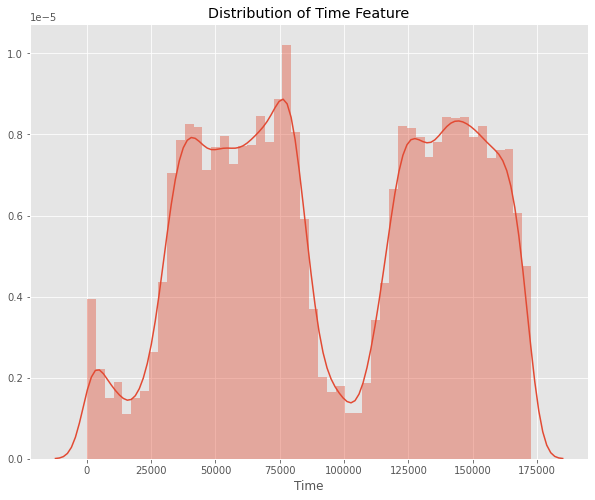

In [26]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(creditcard.Time)

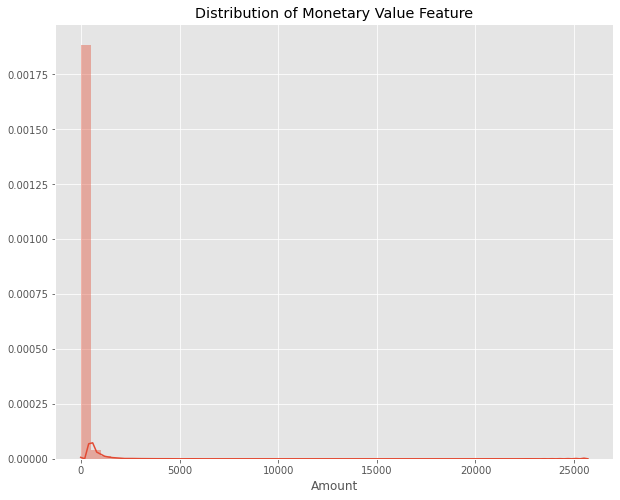

In [29]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(creditcard.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

Just to remember, There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

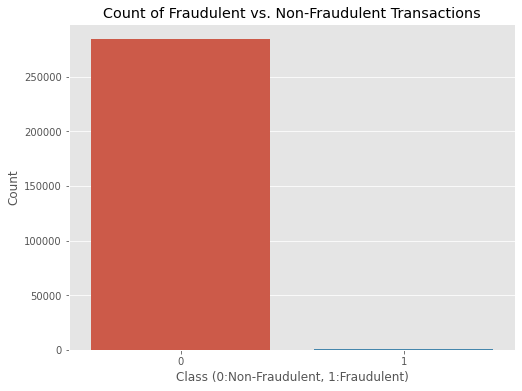

In [31]:
#fraud vs. normal transactions 
counts = creditcard.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('Just to remember, There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [32]:
corr = creditcard.corr()
corr


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,3.062e-02,-2.477e-01,1.243e-01,-6.590e-02,-9.876e-02,-1.835e-01,1.190e-02,-7.330e-02,9.044e-02,2.898e-02,-5.087e-02,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,7.434e-17,2.439e-16,2.422e-16,-2.115e-16,9.353e-16,-3.252e-16,6.309e-16,-5.012e-16,2.870e-16,1.818e-16,1.037e-16,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,-4.782e-16,9.469e-16,-6.588e-16,3.855e-16,-2.541e-16,2.831e-16,4.934e-17,-9.883e-16,2.637e-16,9.528e-17,-9.310e-16,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,6.289e-16,-5.502e-17,2.207e-16,-6.883e-16,4.271e-16,1.123e-16,1.183e-15,4.577e-17,5.428e-16,2.577e-16,-9.429e-16,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,6.055e-16,-2.084e-16,-5.658e-16,-1.506e-16,-8.522e-17,-1.508e-16,-6.939e-16,-4.398e-16,1.494e-16,-2.657e-16,-3.223e-16,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,-6.602e-16,7.343e-16,3.761e-16,-9.579e-16,-3.635e-16,-5.133e-16,-3.517e-16,1.426e-16,1.110e-15,-3.138e-16,2.076e-16,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,2.851e-16,4.866e-16,2.141e-16,-2.268e-16,3.453e-16,-6.368e-18,-2.478e-16,3.568e-16,2.811e-16,2.717e-16,1.899e-16,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,3.043e-17,-1.084e-15,1.510e-15,-9.892e-17,-1.729e-16,1.937e-17,2.894e-16,1.150e-15,-1.117e-16,-2.874e-16,1.744e-16,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,9.052e-17,1.955e-16,-6.266e-17,-2.383e-16,-1.131e-16,2.021e-16,5.027e-16,-3.509e-16,-4.094e-16,-5.340e-16,-1.096e-16,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,-2.772e-16,4.682e-16,-2.445e-15,-2.650e-16,2.343e-16,-1.588e-15,-3.252e-16,6.536e-16,1.204e-16,1.121e-16,-4.341e-16,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

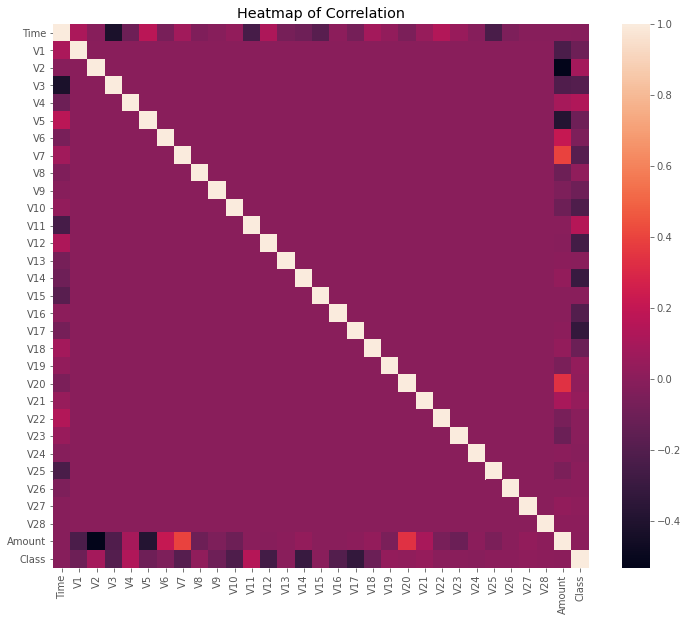

In [33]:
#heatmap
corr = creditcard.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

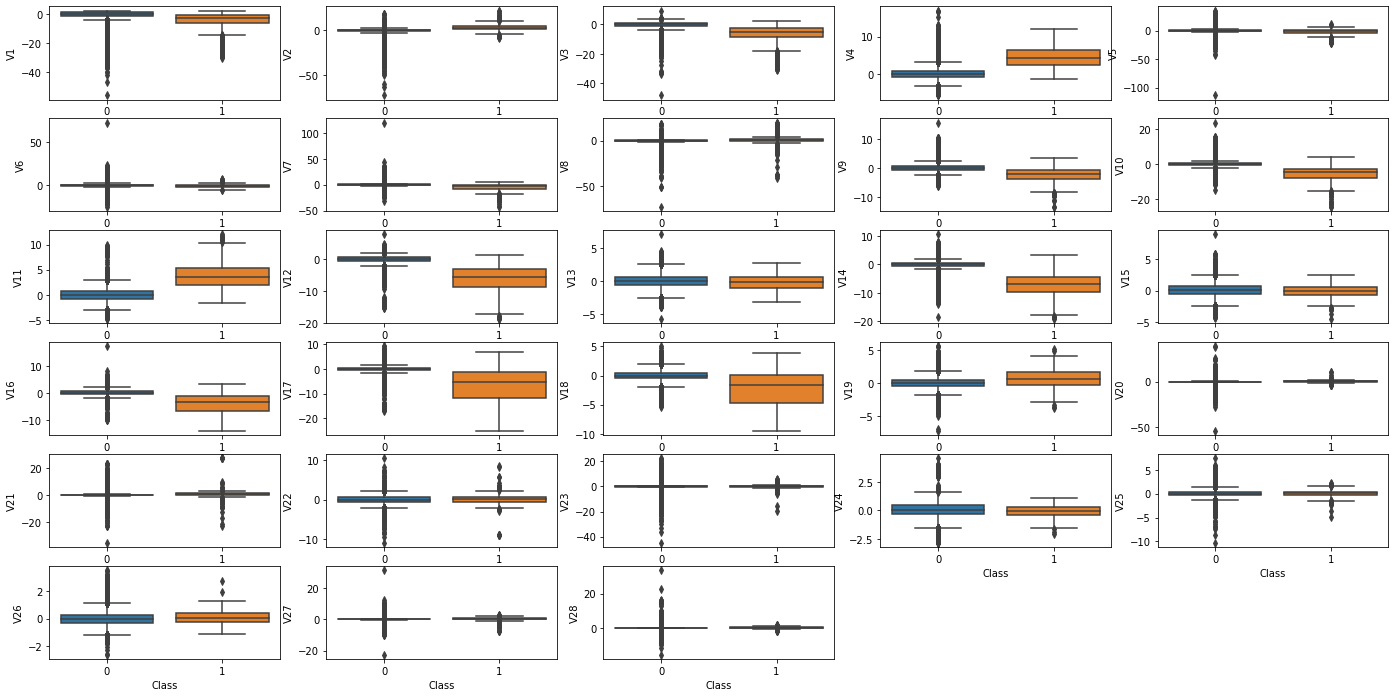

In [20]:
def foo(plot_rows,plot_col,i,col):
    plt.subplot(plot_rows,plot_col,i)
    sns.boxplot(x='Class',y=col,data=creditcard)

plt.figure(figsize=(24,12))
axs = [ foo(6,5,i,'V'+str(i)) for i in range(1,29)]


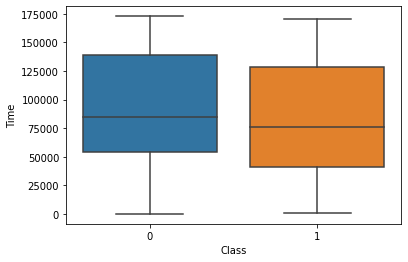

In [21]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

Observations:

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

In [ ]:
sns.scatterplot(x = "Class", y = "Amount", data = creditcard)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
col='V4'

sns.distplot(creditcard[col][creditcard.Class == 1], bins=50, color='r')
sns.distplot(creditcard[col][creditcard.Class == 0], bins=50, color='g')
plt.show()

# Differnat classification on data as is (unbalanced) [OK]

In [8]:
from sklearn.model_selection import train_test_split
x = creditcard.drop('Class',axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 56962, size of traing data = 227845, percentage = 20.000210668979342%


In [ ]:
x

In [ ]:
y

In [9]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr*100)
print(ACC_test_lr*100)

99.89027628431609
99.89466661985183


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
##  Decision tree
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
ACC_train_dt = model_dt.score(x_train,y_train)
ACC_test_dt = model_dt.score(x_test,y_test)
print(ACC_train_dt*100)
print(ACC_test_dt*100)

In [ ]:
## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)
print(ACC_train_svm*100)
print(ACC_test_svm*100)


In [10]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)
print(ACC_train_rf*100)
print(ACC_test_rf*100)

100.0
99.96137776061234


In [ ]:
## Naive Bayse
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train,y_train)
ACC_test_nb = model_nb.score(x_test,y_test)
print(ACC_train_nb*100)
print(ACC_test_nb*100)

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100 , ACC_train_nb*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100 , ACC_test_nb*100])
print(t)

In [ ]:
# use differant performance metric on DT
lr_pred = model_lr.predict(x_test)
dt_pred = model_dt.predict(x_test)
svm_pred = model_svm.predict(x_test)
rf_pred = model_rf.predict(x_test)
nb_pred = model_nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
lr_accuracy_score=  accuracy_score(y_test, lr_pred)
dt_accuracy_score=  accuracy_score(y_test, dt_pred)
svm_accuracy_score=  accuracy_score(y_test, svm_pred)
rf_accuracy_score=  accuracy_score(y_test, rf_pred)
nb_accuracy_score=  accuracy_score(y_test, nb_pred)

from sklearn.metrics import f1_score
# f1 score : F1 score reaches its best value at 1 and worst score at 0
lr_f1_score= f1_score(y_test, lr_pred)
dt_f1_score= f1_score(y_test, dt_pred)
svm_f1_score= f1_score(y_test, svm_pred)
rf_f1_score= f1_score(y_test, rf_pred)
nb_f1_score= f1_score(y_test, nb_pred)

from sklearn.metrics import recall_score
# recall score : The best value is 1 and the worst value is 0
lr_recall_score= recall_score(y_test, lr_pred)
dt_recall_score= recall_score(y_test, dt_pred)
svm_recall_score= recall_score(y_test, svm_pred)
rf_recall_score= recall_score(y_test, rf_pred)
nb_recall_score= recall_score(y_test, nb_pred)

In [ ]:
############################ testing RF with Cross Validation as it scores lower than expected

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
ACC_test_rf1 = cross_val_score(RandomForestClassifier(),x,y)
print(ACC_test_rf1)
###########
ACC_test_rf2 = cross_val_score(RandomForestClassifier(n_estimators=100,oob_score=True),x,y)
print(ACC_test_rf2)
############################
ACC_test_rf3 = cross_val_score(RandomForestClassifier(),x,y,cv=5)
print(ACC_test_rf)


In [ ]:
####### try this with cross_val
from sklearn.model_selection import StratifiedKFold

ACC_test_rf4 = cross_val_score(RandomForestClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_rf4)

In [ ]:
# ####trying to improve RandomForest by tuning hyperparameters

# from sklearn.model_selection import RandomizedSearchCV
# # number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # number of features at every split
# max_features = ['auto', 'sqrt']

# # max depth
# max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
# max_depth.append(None)
# # create random grid
# random_grid = {
# 'n_estimators': n_estimators,
# 'max_features': max_features,
# 'max_depth': max_depth
#  }
# # Random search of parameters
# rfc_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the model
# rfc_random.fit(x_train, y_train)
# # print results
# print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
# ### insert the values returned from the above code
# rfc = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')
# rfc.fit(X_train,y_train)
# rfc_predict = rfc.predict(X_test)
# rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
# print("=== Confusion Matrix ===")
# print(confusion_matrix(y_test, rfc_predict))
# print('\n')
# print("=== Classification Report ===")
# print(classification_report(y_test, rfc_predict))
# print('\n')
# print("=== All AUC Scores ===")
# print(rfc_cv_score)
# print('\n')
# print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

In [11]:
## Another way#############

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
from sklearn.model_selection import cross_val_score

##LR
from sklearn.linear_model import LogisticRegression
ACC_test_lr = cross_val_score(LogisticRegression(),x,y)

##DT
from sklearn.tree import DecisionTreeClassifier
ACC_test_dt = cross_val_score(DecisionTreeClassifier(),x,y)

##SVM
from sklearn.svm import SVC
ACC_test_svm = cross_val_score(SVC(),x,y)

##RF
from sklearn.ensemble import RandomForestClassifier
ACC_test_rf = cross_val_score(RandomForestClassifier(),x,y)

##NB
from sklearn.naive_bayes import GaussianNB
ACC_test_nb = cross_val_score(GaussianNB(),x,y)

ACC_test_lr_mean = np.mean(ACC_test_lr);
ACC_test_dt_mean = np.mean(ACC_test_dt);
ACC_test_svm_mean = np.mean(ACC_test_svm);
ACC_test_rf_mean = np.mean(ACC_test_rf);
ACC_test_nb_mean = np.mean(ACC_test_nb);

from prettytable import PrettyTable
t = PrettyTable(['KVC Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)'])
t.add_row(['Testing', ACC_test_lr_mean*100, ACC_test_dt_mean*100, ACC_test_svm_mean*100, ACC_test_rf_mean*100, ACC_test_nb_mean*100])
print(t)

In [ ]:
from prettytable import PrettyTable
t2 = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)'])
t2.add_row(['accuracy_score', lr_accuracy_score*100, dt_accuracy_score*100, svm_accuracy_score*100, rf_accuracy_score*100 , nb_accuracy_score*100])
t2.add_row(['f1_score',       lr_f1_score*100      , dt_f1_score*100      , svm_f1_score*100       , rf_f1_score*100       , nb_f1_score*100]      )
t2.add_row(['recall_score',   lr_recall_score*100  , dt_recall_score*100  , svm_recall_score*100  , rf_recall_score*100   , nb_recall_score*100]  )
print(t2)

# To Be

*   ECDF
*   K-FOLD
*   Data Hacke ( re-sampling) 







